<a href="https://colab.research.google.com/github/jmarlon/ENV603-DataViz/blob/main/COOT_analysis_V0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

# Task
Create a heatmap from this data

Here is all the data you need:
"COOT_published.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset and display the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('COOT_published.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'COOT_published.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,PPSTATEN,varname,population,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,Very/Extremely important,429979,31.691449,24.173245,23.468411,24.845731,24.824327,22.642437,25.581643,28.217082,30.526049,34.095568,35.888859,36.686274
1,AL,Very/Extremely important,3108132,24.013838,17.416385,17.012040,19.107550,16.971291,15.954504,18.423201,20.611285,19.811181,25.799250,25.496519,26.267216
2,AR,Very/Extremely important,1885607,25.259852,19.522890,18.416036,21.179512,19.661559,17.931562,20.569872,24.245877,23.150096,29.640043,28.361546,29.748047
3,AZ,Very/Extremely important,4017638,29.607256,22.398792,22.249907,23.038316,23.200892,21.977265,24.176071,28.355823,29.533520,33.901471,34.815995,36.977849
4,CA,Very/Extremely important,23497945,38.916713,29.689812,27.717770,30.034252,29.922835,27.731910,32.313543,34.804242,36.158044,42.109126,44.633337,44.436841


(816, 15)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and identify relevant columns for the heatmap.


**Reasoning**:
Examine the data types, descriptive statistics, missing values, and correlations to understand the data and select relevant numerical columns for the heatmap.



In [2]:
# Examine data types
print(df.info())

# Descriptive statistics for numerical columns
print(df.describe())

# Missing values
print(df.isnull().sum())

# Correlation analysis for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Column selection (example: focusing on population data)
selected_columns = ['population', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
# Display the first few rows of the selected columns
display(df[selected_columns].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PPSTATEN    816 non-null    object 
 1   varname     816 non-null    object 
 2   population  816 non-null    int64  
 3   2008        816 non-null    float64
 4   2010        816 non-null    float64
 5   2011        816 non-null    float64
 6   2012        816 non-null    float64
 7   2013        816 non-null    float64
 8   2014        816 non-null    float64
 9   2015        816 non-null    float64
 10  2016        816 non-null    float64
 11  2017        816 non-null    float64
 12  2018        816 non-null    float64
 13  2019        816 non-null    float64
 14  2020        816 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 95.8+ KB
None
         population        2008        2010        2011        2012  \
count  8.160000e+02  816.000000  816.000000  816.000000  8

,population,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,429979,31.691449,24.173245,23.468411,24.845731,24.824327,22.642437,25.581643,28.217082,30.526049,34.095568,35.888859,36.686274
1,3108132,24.013838,17.416385,17.012040,19.107550,16.971291,15.954504,18.423201,20.611285,19.811181,25.799250,25.496519,26.267216
2,1885607,25.259852,19.522890,18.416036,21.179512,19.661559,17.931562,20.569872,24.245877,23.150096,29.640043,28.361546,29.748047
3,4017638,29.607256,22.398792,22.249907,23.038316,23.200892,21.977265,24.176071,28.355823,29.533520,33.901471,34.815995,36.977849
4,23497945,38.916713,29.689812,27.717770,30.034252,29.922835,27.731910,32.313543,34.804242,36.158044,42.109126,44.633337,44.436841


## Data preparation

### Subtask:
Prepare the data for heatmap generation.


**Reasoning**:
Select relevant columns for the heatmap, handle missing values (though none were found in the exploration step), and prepare the data for the heatmap generation.  No scaling is needed in this case, as the data appears already suitable for heatmap visualization.



In [3]:
# Select relevant columns for the heatmap
selected_columns = ['population', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
df_heatmap = df[selected_columns].copy()

# Check for missing values (though none were found in the previous step)
print(df_heatmap.isnull().sum())

# No missing values were found, so no imputation is needed

# No scaling or transformation is necessary as the data already represents numerical values that can be directly visualized in a heatmap

# Display the first few rows of the prepared DataFrame
display(df_heatmap.head())

population    0
2008          0
2010          0
2011          0
2012          0
2013          0
2014          0
2015          0
2016          0
2017          0
2018          0
2019          0
2020          0
dtype: int64


,population,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,429979,31.691449,24.173245,23.468411,24.845731,24.824327,22.642437,25.581643,28.217082,30.526049,34.095568,35.888859,36.686274
1,3108132,24.013838,17.416385,17.012040,19.107550,16.971291,15.954504,18.423201,20.611285,19.811181,25.799250,25.496519,26.267216
2,1885607,25.259852,19.522890,18.416036,21.179512,19.661559,17.931562,20.569872,24.245877,23.150096,29.640043,28.361546,29.748047
3,4017638,29.607256,22.398792,22.249907,23.038316,23.200892,21.977265,24.176071,28.355823,29.533520,33.901471,34.815995,36.977849
4,23497945,38.916713,29.689812,27.717770,30.034252,29.922835,27.731910,32.313543,34.804242,36.158044,42.109126,44.633337,44.436841


## Data visualization

### Subtask:
Create a heatmap of the correlation matrix of the `df_heatmap` DataFrame.


**Reasoning**:
Calculate the correlation matrix, import necessary libraries, create the heatmap, set labels and title, adjust figure size, choose a colormap, and display the plot.



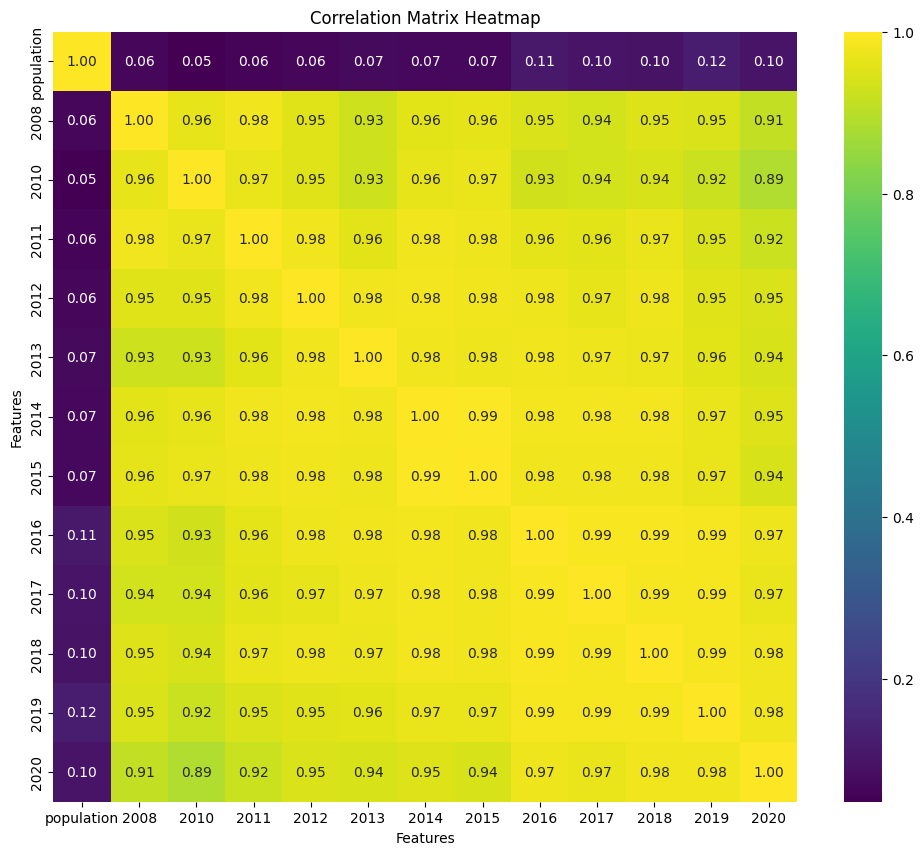

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_heatmap.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f") # Use viridis colormap
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [14]:
# Select the "Very/Extremely important" opinion measure
important_data = df[df['varname'] == 'Very/Extremely important']
heatmap_data = important_data.set_index('PPSTATEN').loc[:, '2010':'2020']

In [15]:
# Perform hierarchical clustering
linkage_result = linkage(heatmap_data, method='ward')
ordered_indices = leaves_list(linkage_result)


In [16]:
# Reorder data based on clustering
ordered_heatmap_data = heatmap_data.iloc[ordered_indices]

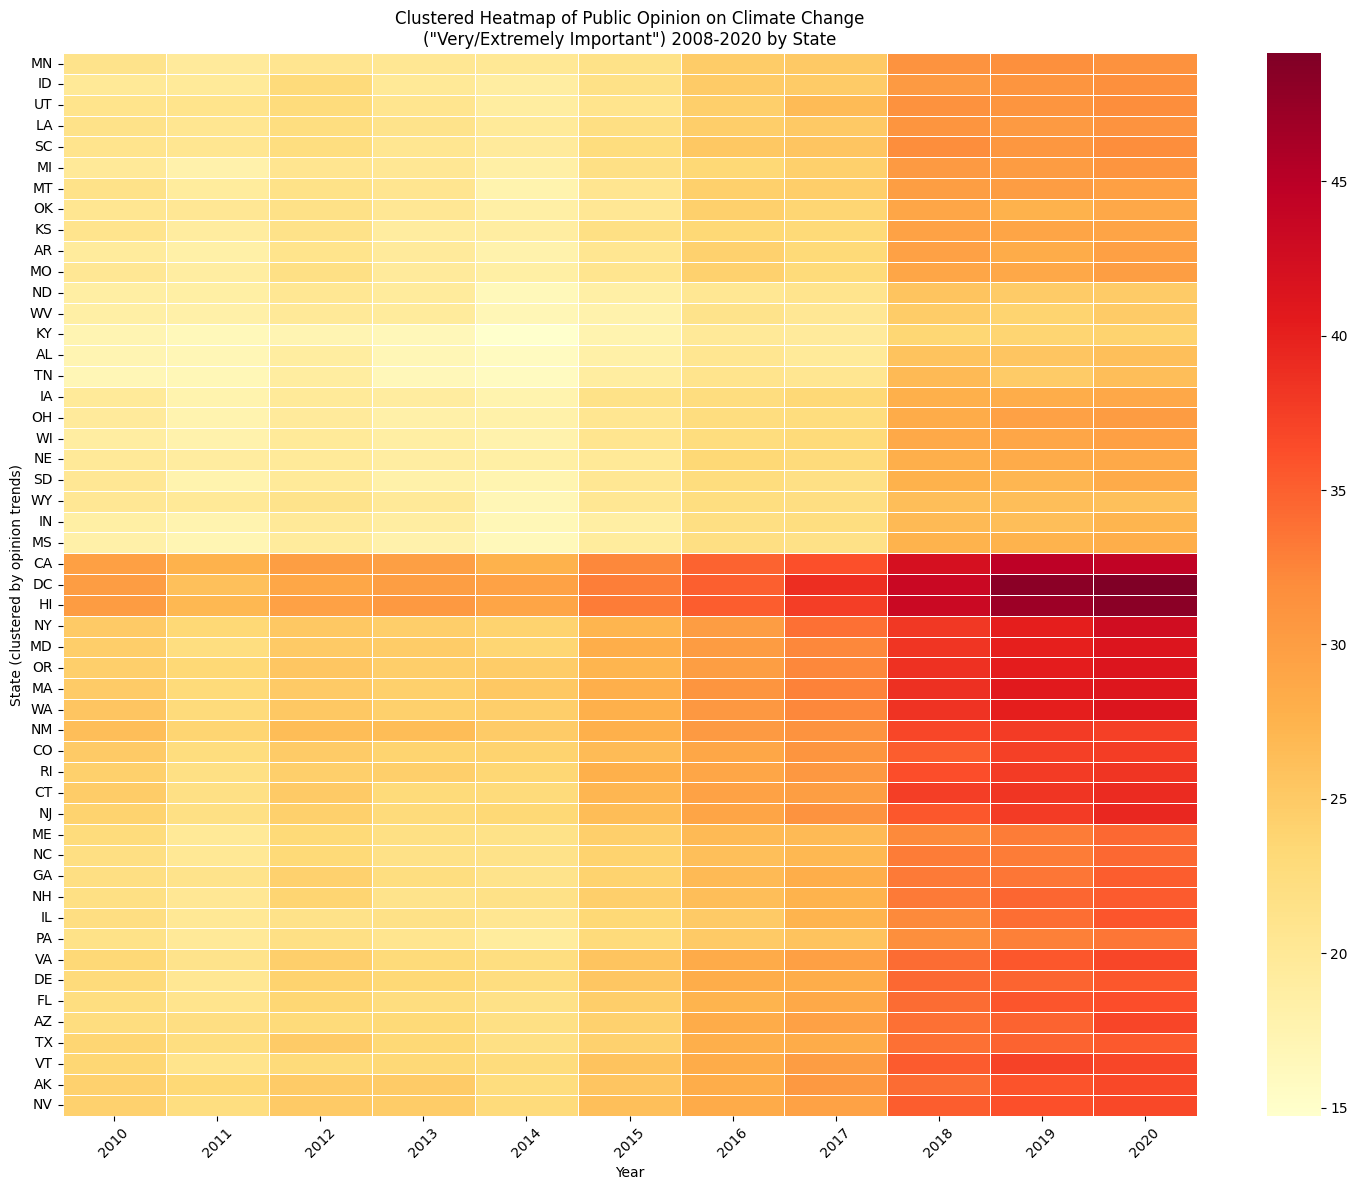

In [17]:
# Plot clustered heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(ordered_heatmap_data, cmap='YlOrRd', annot=False, linewidths=.5)
plt.title('Clustered Heatmap of Public Opinion on Climate Change\n("Very/Extremely Important") 2008-2020 by State')
plt.xlabel('Year')
plt.ylabel('State (clustered by opinion trends)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()
